In [11]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [17]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

5. How many rows and columns are in `gdp_df`? What are the data types of each column?
   ANSWER: 7662 row and 4 columns
            Country or Area     object            
Year                 int64            
Value              float6            4
Value Footnotes    float            jectject

In [134]:
gdp_df.shape

(7662, 3)

In [19]:
gdp_df.info

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]>

In [21]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [23]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

In [136]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [138]:
#count of total years in the dataset
gdp_df['Year'].nunique()

33

In [146]:
gdp_df_year_counts = gdp_df.groupby(['Country']).count().sort_values(by = 'Year')
gdp_df_year_counts

,Year,GDP_Per_Capita
Country,,
Djibouti,10,10
Somalia,10,10
Turks and Caicos Islands,12,12
Sint Maarten (Dutch part),14,14
Kosovo,15,15
...,...,...
Jamaica,33,33
Japan,33,33
Jordan,33,33


In [153]:
gdp_df_year_counts[gdp_df_year_counts['Year'] == 33]

,Year,GDP_Per_Capita
Country,,
Papua New Guinea,33,33
Pakistan,33,33
Australia,33,33
Pacific island small states,33,33
Austria,33,33
...,...,...
Jamaica,33,33
Japan,33,33
Jordan,33,33


In [155]:
gdp_df_year_counts[gdp_df_year_counts['Year'] <33]

,Year,GDP_Per_Capita
Country,,
Djibouti,10,10
Somalia,10,10
Turks and Caicos Islands,12,12
Sint Maarten (Dutch part),14,14
Kosovo,15,15
Cayman Islands,16,16
Nauru,19,19
Afghanistan,20,20
CuraÃ§ao,22,22


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [68]:
GDP_2020 = gdp_df[gdp_df["Year"] == 2020]
GDP_2020.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764


<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

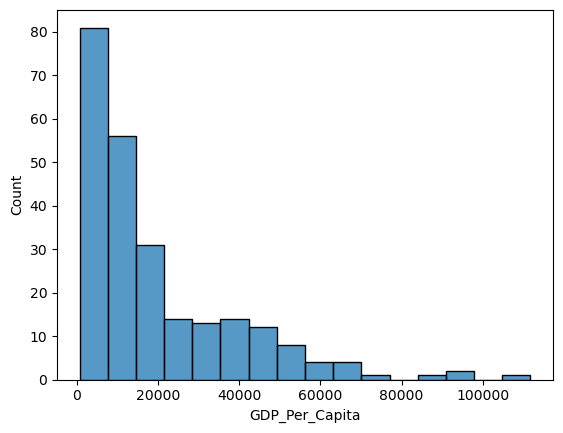

In [70]:
sns.histplot(GDP_2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

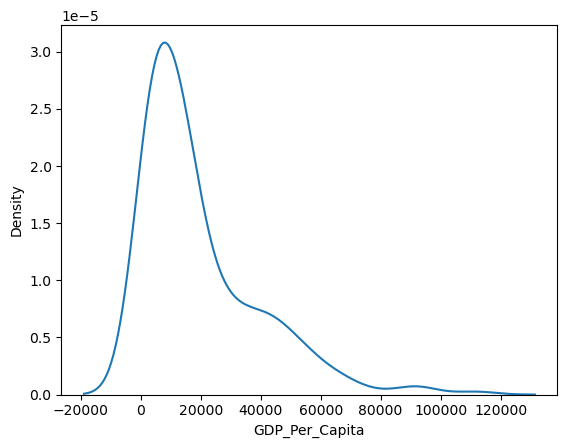

In [157]:
sns.kdeplot(GDP_2020['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

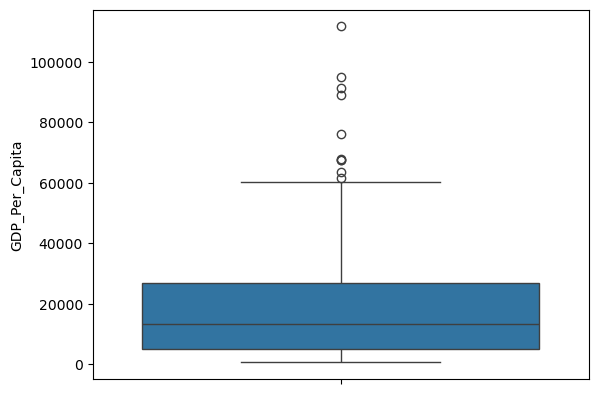

In [157]:
sns.boxplot( y=GDP_2020["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

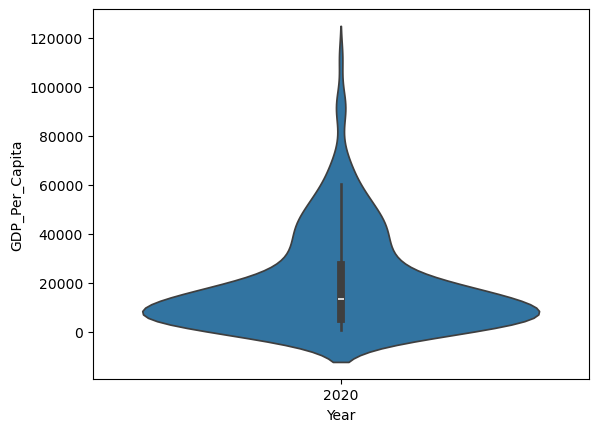

In [166]:
sns.violinplot(x=GDP_2020["Year"], y=GDP_2020["GDP_Per_Capita"])

9. What was the median GDP per capita value in 2020?

In [72]:
GDP_2020.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2020.0,19586.754446
std,0.0,19640.401631
min,2020.0,711.355263
25%,2020.0,4961.408532
50%,2020.0,13357.997573
75%,2020.0,27064.125293
max,2020.0,111751.314751


In [159]:
round(GDP_2020["GDP_Per_Capita"].median(), 4)

13357.9976

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

In [161]:
gdp_decades = gdp_df[gdp_df["Year"].isin([1990, 2000, 2010, 2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

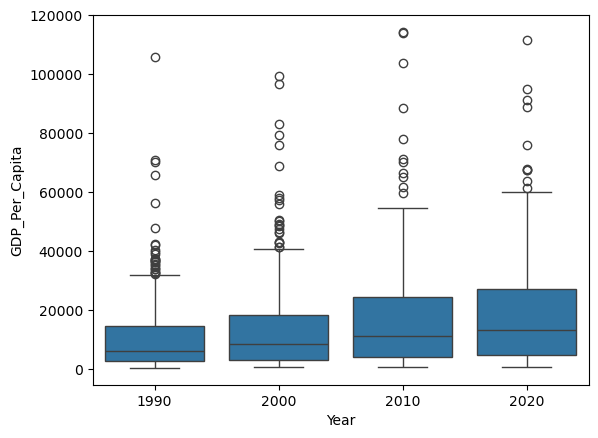

In [78]:
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

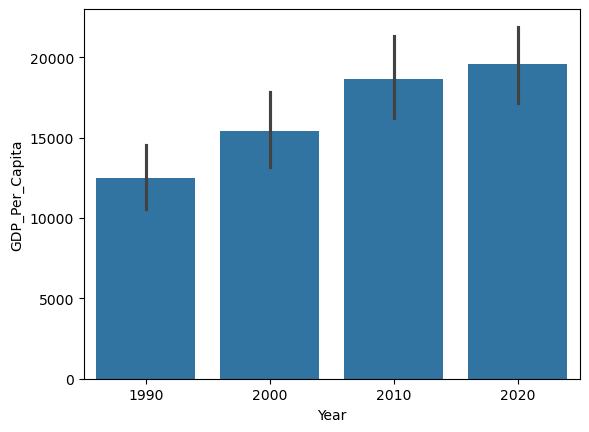

In [80]:
sns.barplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita)
plt.show()

In [ ]:
sns.scatterplot(x=gdp_decades['Year

11. Which country was the first to have a GDP per capita greater than $100,000?

In [171]:
gdp_df[gdp_df["GDP_Per_Capita"] > 100000].sort_values("Year")[:1]

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [181]:
max_gdp_2020 =  GDP_2020['GDP_Per_Capita'].max()
max_gdp_2020

111751.3147513618

In [185]:
GDP_2020[GDP_2020['GDP_Per_Capita'] == max_gdp_2020]

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [189]:
top_country = gdp_df[gdp_df['year'] == 2020].nlargest(1, 'GDP_Per_Capita')['Country'].tolist()[0]
gdp_df[gdp_df['Country']== top_country].plot(x = 'Year', y = 

SyntaxError: incomplete input (517682450.py, line 2)

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [ ]:
gdp_df[gdp_df['Year'] == 2020].nsmallest(1, 'GDP_Per_Capita')['Country

In [193]:
#bonus
gdp_comparison = pd.merge(
    left = gdp_df[gdp_df['Year'] == 1990],
    right = gdp_df[gdp_df['Year'] == 2020],
    on = 'Country',
    suffixes = ['_1990', '_2020']
)

gdp_comparison['2020_lower'] = gdp_comparison['GDP_Per_Capita_2020'] <  gdp_comparison['GDP_Per_Capita_1990']
gdp_comparison

,Country,Year_1990,GDP_Per_Capita_1990,Year_2020,GDP_Per_Capita_2020,2020_lower
0,Africa Eastern and Southern,1990,3037.297466,2020,3455.023119,False
1,Africa Western and Central,1990,2788.301039,2020,3957.933804,False
2,Albania,1990,4827.027705,2020,13278.369769,False
3,Algeria,1990,8828.874473,2020,10844.770764,False
4,Angola,1990,5793.084512,2020,6029.691895,False
...,...,...,...,...,...,...
202,Vanuatu,1990,2774.138350,2020,2848.970240,False
203,Viet Nam,1990,2099.394649,2020,10450.622382,False
204,World,1990,9705.981267,2020,16204.169107,False
205,Zambia,1990,2290.039226,2020,3183.650773,False


In [195]:
gdp_comparison['2020_lower'].value_counts()

2020_lower
False    188
True      19
Name: count, dtype: int64

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [86]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6081)

In [108]:
internet_df.info

<bound method DataFrame.info of      Country or Area  Year      Value
0        Afghanistan  2019  17.600000
1        Afghanistan  2018  16.800000
2        Afghanistan  2017  13.500000
3        Afghanistan  2016  11.000000
4        Afghanistan  2015   8.260000
...              ...   ...        ...
6076        Zimbabwe  1999   0.161676
6077        Zimbabwe  1998   0.081648
6078        Zimbabwe  1997   0.033080
6079        Zimbabwe  1996   0.016790
6080        Zimbabwe  1995   0.007684

[6081 rows x 3 columns]>

In [90]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'

In [ ]:
internet_df = internet_df.drop(columns=['Value Footnotes'])

In [114]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'})
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2019           17.600000
1     Afghanistan  2018           16.800000
2     Afghanistan  2017           13.500000
3     Afghanistan  2016           11.000000
4     Afghanistan  2015            8.260000
...           ...   ...                 ...
6076     Zimbabwe  1999            0.161676
6077     Zimbabwe  1998            0.081648
6078     Zimbabwe  1997            0.033080
6079     Zimbabwe  1996            0.016790
6080     Zimbabwe  1995            0.007684

[6081 rows x 3 columns]


16. Look at the number of observations in this dataset per year. What do you notice?

17. What is the first year to have a non-zero internet users percentage value?

In [118]:
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year')[:1]

,Country,Year,Internet_Users_Pct
5150,Spain,1990,0.012874


18. How does the distribution of internet users percent differ for 2000 and 2014?

19. For how many countries was the percentage of internet users below 5% in 2014?

In [124]:
internet_df[internet_df['Internet_Users_Pct'] < 5] == 2014

,Country,Year,Internet_Users_Pct
9,False,False,False
10,False,False,False
11,False,False,False
12,False,False,False
13,False,False,False
...,...,...,...
6076,False,False,False
6077,False,False,False
6078,False,False,False
6079,False,False,False


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.